### Importing data preparation packages

In [1]:
import numpy as np
import pandas as pd
import json

### Importing training dataset

In [2]:
train = pd.read_csv('train.csv',dtype = {"fullVisitorId":str})

### Separating JSON columns to attributes

In [3]:
totals = train['totals'].apply(lambda x:json.loads(x))
totals_head = totals.apply(pd.Series)
new_names = [(i,'totals_'+i) for i in totals_head.columns.values]
totals_head.rename(columns = dict(new_names), inplace = True)

In [4]:
device = train['device'].apply(lambda x:json.loads(x))
device_head = device.apply(pd.Series)
new_names = [(i,'device_'+i) for i in device_head.columns.values]
device_head.rename(columns = dict(new_names), inplace = True)

In [5]:
geoNetwork = train['geoNetwork'].apply(lambda x:json.loads(x))
geoNetwork_head = geoNetwork.apply(pd.Series)
new_names = [(i,'geoNetwork_'+i) for i in geoNetwork_head.columns.values]
geoNetwork_head.rename(columns = dict(new_names), inplace = True)

In [6]:
trafficSource = train['trafficSource'].apply(lambda x:json.loads(x))
trafficSource_head = trafficSource.apply(pd.Series)
new_names = [(i,'trafficSource_'+i) for i in trafficSource_head.columns.values]
trafficSource_head.rename(columns = dict(new_names), inplace = True)

### Removing the JSON original columns 

In [7]:
train.drop(['device','geoNetwork','totals','trafficSource'], axis = 1, inplace = True)

### Concatenating the separated JSON attributes to our train dataframe

In [8]:
train = pd.concat([train,device_head,geoNetwork_head,totals_head,trafficSource_head], axis = 1)

### Checking the number of columns

In [9]:
len(train.columns)

50

##### The total columns have changed from 12 to 50

### Checking the shape of our dataframe

In [10]:
train.shape

(903653, 50)

### 903653 rows and 50 columns

## Cleaning our data

### We will remove any constant columns and columns with more than 50% null entries except for our target variable.

### First, let's check for null entries % within all columns

### Creating a dictionary to store % of null entries

In [12]:
dictionary = {}
for i in train.columns.values:
    val = train[i].isnull().sum()
    percent = str(round((val/903653)*100,2))
    dictionary[i] = percent

### Converting the dictionary to a dataframe for visualization

In [32]:
train_null = pd.DataFrame.from_dict(dictionary, orient = 'index')

In [33]:
train_null.reset_index(level = 0, inplace = True)

In [34]:
train_null.columns = ['ColumnName', 'PercentNullEntries']

In [35]:
train_null['PercentNullEntries'] = train_null['PercentNullEntries'].astype(float)

In [36]:
train_null_t10 = train_null.sort_values('PercentNullEntries', axis = 0, ascending = False).head(n = 10)

### Visualizing our percentage of Null entries

### Only for visualization purposes we create a new variable hue_null in our train_null_t10 df

In [38]:
train_null_t10['hue_null'] = 0

### Replacing hue_null 0 in target variable to be 1

In [45]:
train_null_t10.iloc[2,2] = 1

In [46]:
train_null_t10

,ColumnName,PercentNullEntries,hue_null
44,trafficSource_campaignCode,100.00,0
41,trafficSource_adContent,98.79,0
39,totals_transactionRevenue,98.73,1
45,trafficSource_isTrueDirect,69.68,0
48,trafficSource_referralPath,63.38,0
46,trafficSource_keyword,55.66,0
35,totals_bounces,50.13,0
37,totals_newVisits,22.20,0
38,totals_pageviews,0.01,0
33,geoNetwork_region,0.00,0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'Column Name')

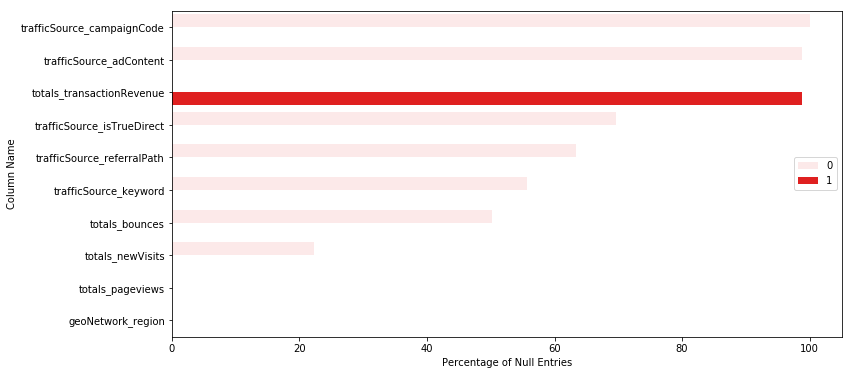

In [82]:
plt.figure(figsize=(12,6))
g = sns.barplot(y = 'ColumnName', x = 'PercentNullEntries', hue = 'hue_null', data = train_null_t10, orient = 'h',
           color = 'red')
#plt.plot([50,50],['totals_pageviews','traffic_campaignCode'], linewidth = 2)
plt.legend(loc = 'right')
plt.xlabel('Percentage of Null Entries')
plt.ylabel('Column Name')

### As stated earlier, we will remove the columns with percentage of null entries >= 50

In [86]:
train_null_t10[train_null_t10['PercentNullEntries']>50]

,ColumnName,PercentNullEntries,hue_null
44,trafficSource_campaignCode,100.00,0
41,trafficSource_adContent,98.79,0
39,totals_transactionRevenue,98.73,1
45,trafficSource_isTrueDirect,69.68,0
48,trafficSource_referralPath,63.38,0
46,trafficSource_keyword,55.66,0
35,totals_bounces,50.13,0


### We drop all columns except for the target variable

In [87]:
null_drop = ['trafficSource_campaignCode','trafficSource_adContent','trafficSource_isTrueDirect',
            'trafficSource_referralPath','trafficSource_keyword','totals_bounces']

In [90]:
train_null_t10[train_null_t10['PercentNullEntries']<50]

,ColumnName,PercentNullEntries,hue_null
37,totals_newVisits,22.20,0
38,totals_pageviews,0.01,0
33,geoNetwork_region,0.00,0


### These null entry column values need to be replaced

### Let's check for the distribution of totals_newVisits and totals_pageviews and accordingly see what should it be replaced with: mean or median

(array([462736.,      0.,      0.,      0.,   1959., 101220.,  56236.,
         70883.,  31269., 179350.]),
 array([ -1. ,  20.3,  41.6,  62.9,  84.2, 105.5, 126.8, 148.1, 169.4,
        190.7, 212. ]),
 <a list of 10 Patch objects>)

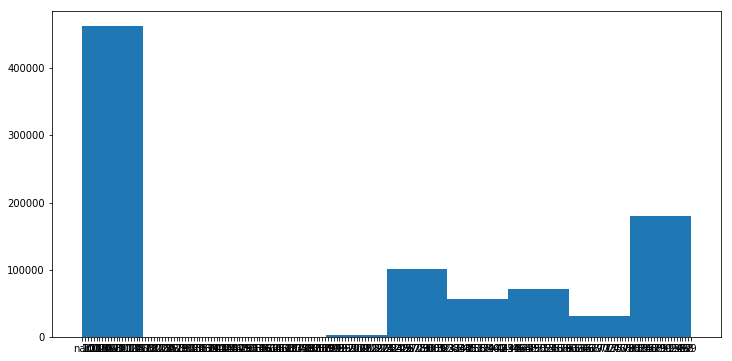

In [95]:
plt.figure(figsize = (12,6))
plt.hist(train['totals_pageviews'])
#plt.xticks(rotation = 90)

/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


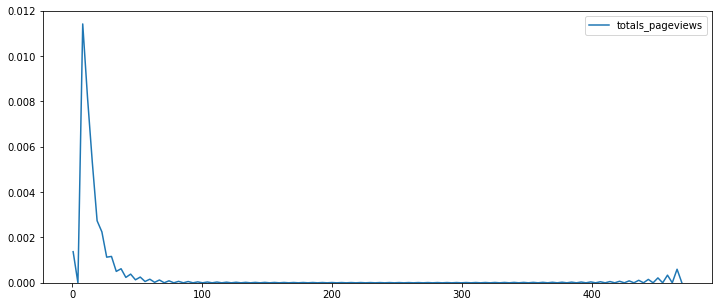

In [97]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = train['totals_pageviews'])

### Transforming totals_pageviews plot to normal through log and then based on the mean or median obtained, we take an anti-log of it

In [119]:
import stats

In [121]:
import scipy

In [131]:
#sns.kdeplot(data = scipy.stats.boxcox(train['totals_pageviews'].astype('float'), lmbda = 50))

In [134]:
#sns.kdeplot(data = np.linalg.inv(train['totals_pageviews'].astype('float')))

In [179]:
np.log(np.power(train['totals_pageviews'].astype('float'),3)).skew()

1.180024146291143

In [178]:
np.log(np.power(train['totals_pageviews'].astype('float'),3)).kurtosis()

0.65851534185364

### Skewness close to 0 and kurtosis close to 3 is considered symmetric data, so we transform our data in order tp be gaussian-like to find out the median or mean

/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


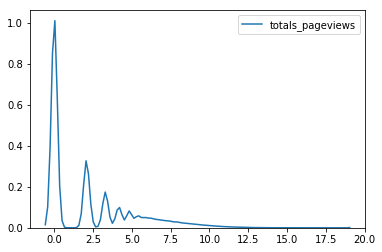

In [182]:
sns.kdeplot(data = np.log(np.power(train['totals_pageviews'].astype('float'),3)))

In [154]:
np.power(np.log1p(train['totals_pageviews'].astype('float')),3).skew()

4.606377813510524

In [151]:
# Skewness above +1 or -1 is considered highly skewed - initial 9.21

In [167]:
train['totals_pageviews'].astype('float').skew()

9.215055489104996

In [168]:
train['totals_pageviews'].astype('float').kurtosis()

237.41487926413637

/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/uditennam/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


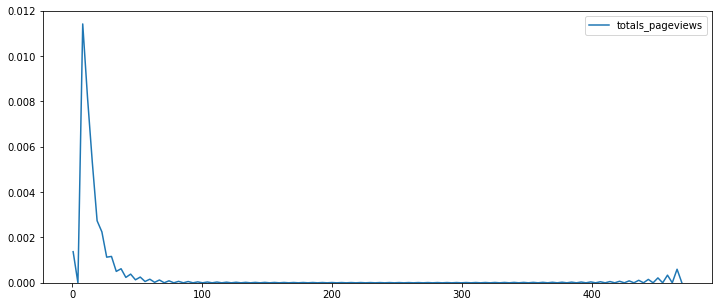

In [144]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = train['totals_pageviews'].astype('float'))

### For our basic model requirements, let's just replace null entries with the median of the column

In [187]:
train['totals_pageviews'] = train['totals_pageviews'].fillna(train['totals_pageviews'].astype('float').median())

In [191]:
train['totals_newVisits'].value_counts() # yes -> 1 || no -> 0 

1    703060
Name: totals_newVisits, dtype: int64

In [193]:
train['totals_newVisits'] = train['totals_newVisits'].fillna(0)

### Dropping columns with null entry % > 50

In [196]:
train.drop(null_drop, axis = 1, inplace = True)

In [197]:
train.shape

(903653, 44)

### 44 non-null columns

### Removing columns with constant values

In [199]:
train = train.loc[:, (train != train.iloc[0]).any()] # train_nc -> train dataframe with non-constant columns

In [200]:
train.shape

(903653, 26)

### Now, we have 26 non-null and non-constant columns remaining

### Let's create a new column which categorizes our target variables to 1 and 0, with 1 being revenue > 0, and 0 being null, which will be converted to 0.

In [202]:
train['totals_transactionRevenue'] = train['totals_transactionRevenue'].fillna(0)

/home/uditennam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
def revenue_cat(x):
    if x > 0:
        return 1
    else:
        return 0

In [210]:
train['totals_transactionRevenue'][90]

0

In [217]:
train['revenue_category']=train['totals_transactionRevenue'].astype('float').apply(lambda x:revenue_cat(x))

In [218]:
train['totals_transactionRevenue'] = train['totals_transactionRevenue'].astype('float')

In [219]:
train.shape

(903653, 27)

### 27 features in total out of which totals_transactionRevenue will be the target variable for regression models and revenue_category will be the target variable for classification models. So, technically, only 25 features need to be explored and visualized.

### Let's check these columns one by one again for any anomalies and eliminate them if necessary

In [225]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_hits', 'totals_newVisits',
       'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adwordsClickInfo', 'trafficSource_campaign',
       'trafficSource_medium', 'trafficSource_source', 'revenue_category'],
      dtype='object')

In [221]:
train['channelGrouping'].value_counts()

Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64

In [224]:
train['channelGrouping'] = train['channelGrouping'].replace('(Other)', 'Other')

In [229]:
train['date'].min()

20160801

In [230]:
train['date'].max()

20170801

### The date range of this dataset is Aug 1st, 2016 to Aug 1st, 2017 (effectively a year's data)

In [231]:
train['visitStartTime'].head()

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
Name: visitStartTime, dtype: int64

### train['visitStartTime'] values are in POSIX time which can be converted to datetime format

In [233]:
new_drop = []

In [234]:
new_drop.append('date')

In [235]:
from datetime import datetime
import time

In [242]:
train['visitStartTime'] = train['visitStartTime'].apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [244]:
train['visitStartTime'] = train['visitStartTime'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [245]:
train['visitDate'] = train['visitStartTime'].apply(lambda x: x.date())
train['visitTime'] = train['visitStartTime'].apply(lambda x: x.time())

In [246]:
new_drop.append('visitStartTime')

In [247]:
len(train['sessionId'].unique())

902755

In [248]:
# not a useful column
new_drop.append('sessionId')

In [249]:
len(train['visitId'].unique())

886303

In [250]:
# not a useful column
new_drop.append('visitId')

In [253]:
len(train['device_browser'].unique())

54

In [254]:
train['device_browser'].value_counts()

Chrome                                         620364
Safari                                         182245
Firefox                                         37069
Internet Explorer                               19375
Edge                                            10205
Android Webview                                  7865
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5643
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       561
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintendo Browser            

In [255]:
len(train['device_deviceCategory'].unique())

3

In [256]:
train['device_deviceCategory'].value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: device_deviceCategory, dtype: int64

In [257]:
len(train['device_isMobile'].unique())

2

In [258]:
train['device_isMobile'].value_counts()

False    664530
True     239123
Name: device_isMobile, dtype: int64

In [265]:
train['device_isMobile'] = train['device_isMobile'].astype('str')

In [267]:
train['device_isMobile'] = train['device_isMobile'].replace('True',1).replace('False',0)

In [268]:
len(train['device_operatingSystem'].unique())

20

In [269]:
train['device_operatingSystem'].value_counts()

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
(not set)          4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           89
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
OpenBSD               2
Nokia                 2
Nintendo 3DS          1
SunOS                 1
NTT DoCoMo            1
Name: device_operatingSystem, dtype: int64

### We have 4 device specific columns 

In [270]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_hits', 'totals_newVisits',
       'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adwordsClickInfo', 'trafficSource_campaign',
       'trafficSource_medium', 'trafficSource_source', 'revenue_category',
       'visitDate', 'visitTime'],
      dtype='object')

In [271]:
len(train['geoNetwork_city'].unique())

649

In [272]:
len(train['geoNetwork_continent'].unique())

6

In [273]:
len(train['geoNetwork_country'].unique())

222

In [274]:
len(train['geoNetwork_metro'].unique())

94

In [275]:
len(train['geoNetwork_networkDomain'].unique())

28064

In [276]:
len(train['geoNetwork_region'].unique())

376

In [279]:
train['geoNetwork_networkDomain'].value_counts().head(n = 10)

(not set)              244881
unknown.unknown        146034
comcast.net             28743
rr.com                  14827
verizon.net             13637
ttnet.com.tr            13228
comcastbusiness.net      9985
hinet.net                7919
virginm.net              6414
3bb.co.th                6046
Name: geoNetwork_networkDomain, dtype: int64

In [280]:
new_drop.append('geoNetwork_networkDomain')

In [282]:
len(train['geoNetwork_subContinent'].unique())

23

In [286]:
train['totals_hits'] = train['totals_hits'].astype('int')

In [290]:
train['totals_isNewVisit'] = train['totals_newVisits'].astype('int')

In [291]:
new_drop.append('totals_newVisits')

In [296]:
train['totals_pageviews'] = train['totals_pageviews'].astype('int')

In [303]:
#traffic = train['trafficSource_adwordsClickInfo'].apply(lambda x:json.loads(x))
traffic_head = train['trafficSource_adwordsClickInfo'].apply(pd.Series)
new_names = [(i,'trafficSource_adwordsClickInfo_'+i) for i in traffic_head.columns.values]
traffic_head.rename(columns = dict(new_names), inplace = True)

In [304]:
traffic_head

,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_targetingCriteria
0,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
1,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
2,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
3,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
4,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
5,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
6,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
7,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
8,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
9,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN


In [305]:
dictionary1 = {}
for i in traffic_head.columns.values:
    val = traffic_head[i].isnull().sum()
    percent = str(round((val/903653)*100,2))
    dictionary1[i] = percent

### Converting the dictionary to a dataframe for visualization

train_null = pd.DataFrame.from_dict(dictionary1, orient = 'index')

train_null.reset_index(level = 0, inplace = True)

train_null.columns = ['ColumnName', 'PercentNullEntries']

train_null['PercentNullEntries'] = train_null['PercentNullEntries'].astype(float)

train_null_t10 = train_null.sort_values('PercentNullEntries', axis = 0, ascending = False).head(n = 10)

In [306]:
train_null_t10

,ColumnName,PercentNullEntries
6,trafficSource_adwordsClickInfo_targetingCriteria,99.84
0,trafficSource_adwordsClickInfo_adNetworkType,97.63
3,trafficSource_adwordsClickInfo_isVideoAd,97.63
4,trafficSource_adwordsClickInfo_page,97.63
5,trafficSource_adwordsClickInfo_slot,97.63
2,trafficSource_adwordsClickInfo_gclId,97.61
1,trafficSource_adwordsClickInfo_criteriaParameters,0.00


In [308]:
traffic_head['trafficSource_adwordsClickInfo_criteriaParameters'].value_counts()

not available in demo dataset    903653
Name: trafficSource_adwordsClickInfo_criteriaParameters, dtype: int64

### Let's remove the variable trafficSource_adwordsClickInfo now

In [309]:
new_drop.append('trafficSource_adwordsClickInfo')

In [310]:
len(train['trafficSource_campaign'].unique())

10

In [314]:
train['trafficSource_campaign'].value_counts()

(not set)                                          865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: trafficSource_campaign, dtype: int64

In [311]:
len(train['trafficSource_medium'].unique())

7

In [315]:
train['trafficSource_medium'].value_counts()

organic      381561
referral     330955
(none)       143026
cpc           25326
affiliate     16403
cpm            6262
(not set)       120
Name: trafficSource_medium, dtype: int64

In [312]:
len(train['trafficSource_source'].unique())

380

In [316]:
train['trafficSource_source'].value_counts().head(n = 10)

google                  400788
youtube.com             212602
(direct)                143028
mall.googleplex.com      66416
Partners                 16411
analytics.google.com     16172
dfa                       5686
google.com                4669
m.facebook.com            3365
baidu                     3356
Name: trafficSource_source, dtype: int64

In [317]:
new_drop

['date',
 'visitStartTime',
 'sessionId',
 'visitId',
 'geoNetwork_networkDomain',
 'totals_newVisits',
 'trafficSource_adwordsClickInfo']

In [320]:
train.drop(new_drop, axis = 1, inplace = True)

### There are 23 columns including our 2 target variables, effectively we have 21 columns to work with 

## Exploration and Visualization

In [321]:
train.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_region', 'geoNetwork_subContinent',
       'totals_hits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_campaign', 'trafficSource_medium',
       'trafficSource_source', 'revenue_category', 'visitDate', 'visitTime',
       'totals_isNewVisit'],
      dtype='object')

In [322]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [330]:
import plotly.graph_objs as go

In [337]:
# Categorical columns will be visualized using combination charts
device_cols = ['device_browser','device_deviceCategory', 'device_isMobile', 'device_operatingSystem']
geoNetwork_cols = ['geoNetwork_city','geoNetwork_continent','geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_region', 'geoNetwork_subContinent']
totals_cols = ['totals_isNewVisit']
trafficSource_cols = ['trafficSource_campaign','trafficSource_medium','trafficSource_source']
misc_cols = ['channelGrouping']

In [328]:
train['visitNumber'] = train['visitNumber'].astype('int')

In [332]:
for i in device_cols:
    cnt_cat = train[i].value_counts().sort_index().head(n=10)
    trans_cat = train.sort_values(i).groupby(i, as_index = False)['totals_transactionRevenue'].mean().head(n=10)
    cnt_cat_x = cnt_cat.index.tolist()
    cnt_cat_y = cnt_cat.values.tolist()
    trans_cat_x = trans_cat[i].tolist()
    trans_cat_y = trans_cat['totals_transactionRevenue'].tolist()
    trace1 = go.Bar(x=cnt_cat_x,y=cnt_cat_y, name = "count")
    trace2 = go.Scatter(x=trans_cat_x, y = trans_cat_y, name = "revenue", yaxis = 'y2')
    data = [trace1, trace2]
    layout = go.Layout(
        title = i,
        yaxis = dict(
            title = "count",
            rangemode = 'tozero',
            showgrid = False
        ),
        yaxis2 = dict(
            title = "revenue",
            showgrid = False,
            overlaying = "y",
            rangemode = 'tozero', # rangemode used for aligning
            side="right")
    )
    fig = go.Figure(data=data, layout=layout)
    #fig.append_trace()
    #arr.append(fig1)
    iplot(fig)
#fig.append_trace(arr[0], 1, 1)
#fig.append_trace(arr[1], 1, 2)
#fig.append_trace(arr[2], 1, 3)

#    fig = go.Figure(data=data, layout=layout)
#iplot(fig)

In [333]:
for i in geoNetwork_cols:
    cnt_cat = train[i].value_counts().sort_index().head(n=10)
    trans_cat = train.sort_values(i).groupby(i, as_index = False)['totals_transactionRevenue'].mean().head(n=10)
    cnt_cat_x = cnt_cat.index.tolist()
    cnt_cat_y = cnt_cat.values.tolist()
    trans_cat_x = trans_cat[i].tolist()
    trans_cat_y = trans_cat['totals_transactionRevenue'].tolist()
    trace1 = go.Bar(x=cnt_cat_x,y=cnt_cat_y, name = "count")
    trace2 = go.Scatter(x=trans_cat_x, y = trans_cat_y, name = "revenue", yaxis = 'y2')
    data = [trace1, trace2]
    layout = go.Layout(
        title = i,
        yaxis = dict(
            title = "count",
            rangemode = 'tozero',
            showgrid = False
        ),
        yaxis2 = dict(
            title = "revenue",
            showgrid = False,
            overlaying = "y",
            rangemode = 'tozero', # rangemode used for aligning
            side="right")
    )
    fig = go.Figure(data=data, layout=layout)
    #fig.append_trace()
    #arr.append(fig1)
    iplot(fig)
#fig.append_trace(arr[0], 1, 1)
#fig.append_trace(arr[1], 1, 2)
#fig.append_trace(arr[2], 1, 3)

#    fig = go.Figure(data=data, layout=layout)
#iplot(fig)

In [334]:
for i in totals_cols:
    cnt_cat = train[i].value_counts().sort_index().head(n=10)
    trans_cat = train.sort_values(i).groupby(i, as_index = False)['totals_transactionRevenue'].mean().head(n=10)
    cnt_cat_x = cnt_cat.index.tolist()
    cnt_cat_y = cnt_cat.values.tolist()
    trans_cat_x = trans_cat[i].tolist()
    trans_cat_y = trans_cat['totals_transactionRevenue'].tolist()
    trace1 = go.Bar(x=cnt_cat_x,y=cnt_cat_y, name = "count")
    trace2 = go.Scatter(x=trans_cat_x, y = trans_cat_y, name = "revenue", yaxis = 'y2')
    data = [trace1, trace2]
    layout = go.Layout(
        title = i,
        yaxis = dict(
            title = "count",
            rangemode = 'tozero',
            showgrid = False
        ),
        yaxis2 = dict(
            title = "revenue",
            showgrid = False,
            overlaying = "y",
            rangemode = 'tozero', # rangemode used for aligning
            side="right")
    )
    fig = go.Figure(data=data, layout=layout)
    #fig.append_trace()
    #arr.append(fig1)
    iplot(fig)
#fig.append_trace(arr[0], 1, 1)
#fig.append_trace(arr[1], 1, 2)

In [335]:
for i in trafficSource_cols:
    cnt_cat = train[i].value_counts().sort_index().head(n=10)
    trans_cat = train.sort_values(i).groupby(i, as_index = False)['totals_transactionRevenue'].mean().head(n=10)
    cnt_cat_x = cnt_cat.index.tolist()
    cnt_cat_y = cnt_cat.values.tolist()
    trans_cat_x = trans_cat[i].tolist()
    trans_cat_y = trans_cat['totals_transactionRevenue'].tolist()
    trace1 = go.Bar(x=cnt_cat_x,y=cnt_cat_y, name = "count")
    trace2 = go.Scatter(x=trans_cat_x, y = trans_cat_y, name = "revenue", yaxis = 'y2')
    data = [trace1, trace2]
    layout = go.Layout(
        title = i,
        yaxis = dict(
            title = "count",
            rangemode = 'tozero',
            showgrid = False
        ),
        yaxis2 = dict(
            title = "revenue",
            showgrid = False,
            overlaying = "y",
            rangemode = 'tozero', # rangemode used for aligning
            side="right")
    )
    fig = go.Figure(data=data, layout=layout)
    #fig.append_trace()
    #arr.append(fig1)
    iplot(fig)
#fig.append_trace(arr[0], 1, 1)
#fig.append_trace(arr[1], 1, 2)

In [338]:
for i in misc_cols:
    cnt_cat = train[i].value_counts().sort_index().head(n=10)
    trans_cat = train.sort_values(i).groupby(i, as_index = False)['totals_transactionRevenue'].mean().head(n=10)
    cnt_cat_x = cnt_cat.index.tolist()
    cnt_cat_y = cnt_cat.values.tolist()
    trans_cat_x = trans_cat[i].tolist()
    trans_cat_y = trans_cat['totals_transactionRevenue'].tolist()
    trace1 = go.Bar(x=cnt_cat_x,y=cnt_cat_y, name = "count")
    trace2 = go.Scatter(x=trans_cat_x, y = trans_cat_y, name = "revenue", yaxis = 'y2')
    data = [trace1, trace2]
    layout = go.Layout(
        title = i,
        yaxis = dict(
            title = "count",
            rangemode = 'tozero',
            showgrid = False
        ),
        yaxis2 = dict(
            title = "revenue",
            showgrid = False,
            overlaying = "y",
            rangemode = 'tozero', # rangemode used for aligning
            side="right")
    )
    fig = go.Figure(data=data, layout=layout)
    #fig.append_trace()
    #arr.append(fig1)
    iplot(fig)
#fig.append_trace(arr[0], 1, 1)
#fig.append_trace(arr[1], 1, 2)